# Demo: Motion illusions as optimal percepts

First, just create our imports and define a few helper functions to get started:

In [1]:
%matplotlib inline
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from ipywidgets import interact

def imshow(ax, p):
    """Show the probabilities as a function of x and y velocities."""
    ax.imshow(p.T, origin='lower', interpolation='nearest', cmap='gray')
    xmid = (p.shape[1] - 1) / 2
    ymid = (p.shape[0] - 1) / 2
    ax.vlines(ymid, 0, p.shape[1], color='gray')
    ax.hlines(xmid, 0, p.shape[0], color='gray')
    ax.set_xticks([])
    ax.set_yticks([])

def uniform(x, low, high):
    """Compute the log probability for a uniform random variable between (low, high)."""
    return scipy.stats.uniform.logpdf(x, low, high - low)

def norm(x, mu, sigma):
    """Compute the log probability for a Gaussian random variable with parameters μ and σ."""
    return scipy.stats.norm.logpdf(x, mu, sigma)

Define a few options for the prior. In the paper, they used the equivalent of `prior1`, but I'm also interested in comparing to a uniform prior and a Gaussian prior with different mean:

In [2]:
def prior1(vx, vy):
    """Zero-mean Gaussian prior with σ=25"""
    return norm(vx, 0, 25) + norm(vy, 0, 25)

def prior2(vx, vy):
    """Velocity Average (VA) Gaussian prior with σ=5"""
    return norm(vx, 17.88461538, 5) + norm(vy, -14.42307692, 5)

def prior3(vx, vy):
    """Uniform prior between -50 and 50"""
    return uniform(vx, -50, 100) + uniform(vy, -50, 100)

Now, define the full model. This assumes a thin rhombus, but the prior function and the contrast (i.e., inverse sigma) can be modified:

In [3]:
def model(prior_func, sigma):
    vx, vy = np.ogrid[-50:51,-50:51]
    prior = prior_func(vx, vy)
    lh1 = uniform(vx, -50, 100) + norm(vy - vx + 30, 0, sigma)
    lh2 = uniform(vx, -50, 100) + norm(vy - 1.5 * vx + 45, 0, sigma)
    posterior = lh1 + lh2 + prior
    MAP = np.unravel_index(np.argmax(posterior), posterior.shape)

    fig, axes = plt.subplots(1, 4)
    fig.set_size_inches(12, 3)

    imshow(axes[0], np.exp(prior))
    axes[0].set_title('Prior')
    
    imshow(axes[1], np.exp(lh1))
    axes[1].set_title('Likelihood 1')
    
    imshow(axes[2], np.exp(lh2))
    axes[2].set_title('Likelihood 2')
    
    imshow(axes[3], np.exp(posterior))
    axes[3].set_title('Posterior')
    axes[3].autoscale(enable=False)
    axes[3].plot(MAP[0], MAP[1], 'ro')

Original prior, high contrast:

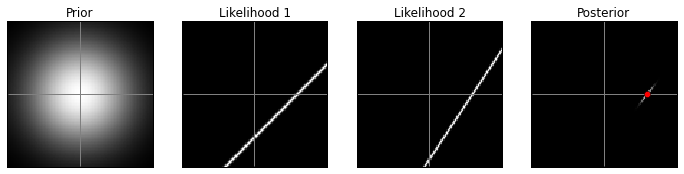

In [4]:
model(prior1, 1)

Original prior, low contrast:

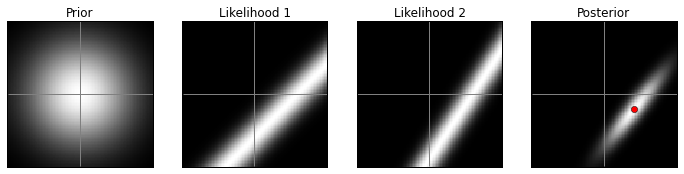

In [5]:
model(prior1, 10)

VA prior, high contrast:

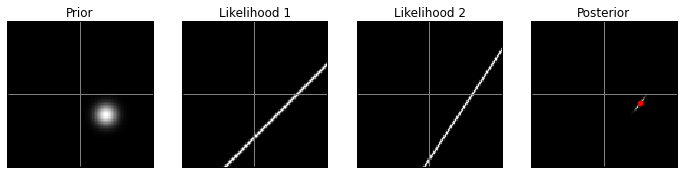

In [6]:
model(prior2, 1)

VA prior, low contrast:

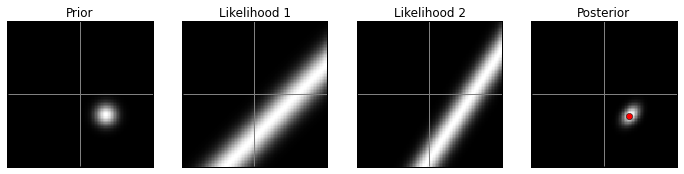

In [7]:
model(prior2, 10)

Uniform prior, high contrast:

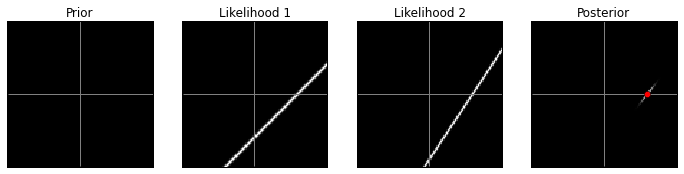

In [8]:
model(prior3, 1)

Uniform prior, low contrast:

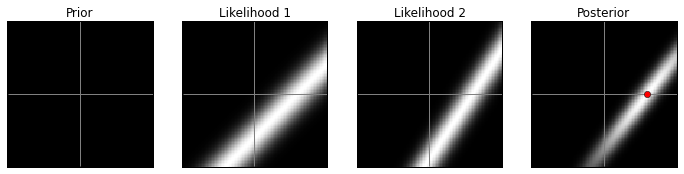

In [9]:
model(prior3, 10)